In [1]:
import requests
import pandas as pd

In [218]:
%matplotlib inline

In [5]:
from bs4 import BeautifulSoup as bs

In [2]:
url = 'http://genius.com/Game-of-thrones-list-of-game-of-thrones-deaths-annotated'

In [2]:
print url

NameError: name 'url' is not defined

In [3]:
r = requests.get(url)

In [6]:
data = r.content

In [9]:
soup = bs(data, 'html.parser')

In [163]:
text =  soup.get_text()

text = text.split('Rhaenys Targaryen')[1]
text = text.split('About')[0]

In [170]:
deaths = [x for x in text.split('\n') if len(x) > 1]
test = deaths[1]
bullet = test[0]
googletag = 'googletag.cmd.push(function() { googletag.display("div-gpt-ad-HqdC7wzT9dxebU4CH35u3w"); });'
deaths = [x.replace(googletag,'') for x in deaths]

In [171]:
deaths

[u'Season 1Episode 1: "Winter Is Coming"',
 u'\u2022Waymar Royce',
 u'\u2022Gared',
 u'\u2022Will',
 u'\u2022Jon Arryn',
 u'Episode 2: "The Kingsroad"',
 u'\u2022Catspaw assassin',
 u'\u2022Lady',
 u'\u2022Mycah',
 u'Episode 4: "Cripples, Bastards and Broken Things"',
 u'\u2022Ser Hugh',
 u'Episode 5: "The Wolf and the Lion"',
 u'\u2022Kurleket',
 u'\u2022Willis Wode',
 u'\u2022Jory Cassel',
 u'\u2022Wyl',
 u'\u2022Heward',
 u'Episode 6: "A Golden Crown"',
 u'\u2022Wallen',
 u'\u2022Stiv',
 u'\u2022Vardis Egen',
 u'\u2022Viserys Targaryen',
 u'Episode 7: "You Win or You Die"',
 u'\u2022Robert Baratheon',
 u'\u2022Varly',
 u'Episode 8: "The Pointy End"',
 u'\u2022Vayon Poole',
 u'\u2022Septa Mordane',
 u'\u2022Syrio Forel',
 u'\u2022Stableboy',
 u'\u2022Mago',
 u'\u2022Jafer Flowers',
 u'\u2022Othor',
 u'Episode 9: "Baelor"',
 u'\u2022Qotho',
 u'\u2022Eddard "Ned" Stark',
 u'Episode 10: "Fire and Blood"',
 u'\u2022Rhaego',
 u'\u2022Khal Drogo',
 u'\u2022Mirri Maz Duur',
 u'Season 2Episo

In [172]:
deaths = [x.replace(bullet,'') for x in deaths]
deaths = [x.replace('Episode',' Episode') if x[:7] != 'Episode' else x for x in deaths ]

In [173]:
deaths

[u'Season 1 Episode 1: "Winter Is Coming"',
 u'Waymar Royce',
 u'Gared',
 u'Will',
 u'Jon Arryn',
 u'Episode 2: "The Kingsroad"',
 u'Catspaw assassin',
 u'Lady',
 u'Mycah',
 u'Episode 4: "Cripples, Bastards and Broken Things"',
 u'Ser Hugh',
 u'Episode 5: "The Wolf and the Lion"',
 u'Kurleket',
 u'Willis Wode',
 u'Jory Cassel',
 u'Wyl',
 u'Heward',
 u'Episode 6: "A Golden Crown"',
 u'Wallen',
 u'Stiv',
 u'Vardis Egen',
 u'Viserys Targaryen',
 u'Episode 7: "You Win or You Die"',
 u'Robert Baratheon',
 u'Varly',
 u'Episode 8: "The Pointy End"',
 u'Vayon Poole',
 u'Septa Mordane',
 u'Syrio Forel',
 u'Stableboy',
 u'Mago',
 u'Jafer Flowers',
 u'Othor',
 u'Episode 9: "Baelor"',
 u'Qotho',
 u'Eddard "Ned" Stark',
 u'Episode 10: "Fire and Blood"',
 u'Rhaego',
 u'Khal Drogo',
 u'Mirri Maz Duur',
 u'Season 2 Episode 1: "The North Remembers"',
 u'Maester Cressen',
 u'Barra',
 u'Episode 2: "The Night Lands"',
 u'Rakharo',
 u'Episode 3: "What is Dead May Never Die"',
 u'Yoren',
 u'Lommy Greenhands

In [236]:
df = pd.DataFrame(deaths)
df.columns = ['death']
df['season'] = [x.split()[1] if 'Season' in x else float('NaN') for x in df['death']]
df['episode'] = [x.split('Episode')[1].split()[0].strip(':') if 'Episode' in x else float('NaN') for x in df['death']]
df = df.fillna(method='ffill')
df['epID'] = df['season'] + [e.zfill(2) for e in df['episode']]
df['epID'] = [str(e) for e in df['epID']]
df = df[df['death'].str.contains('Episode') == False]
df = df[df['death'] != '              ']

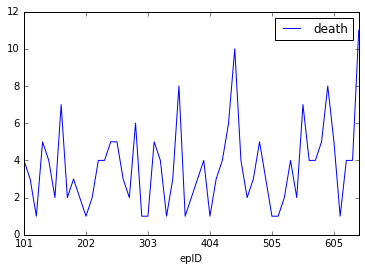

In [238]:
df[['epID','death']].groupby('epID').count().plot()

In [213]:
len(df[df['season'] == '1'])

31

In [239]:
import sqlite3


In [241]:
df.head()

,death,season,episode,epID
1,Waymar Royce,1,1,101
2,Gared,1,1,101
3,Will,1,1,101
4,Jon Arryn,1,1,101
6,Catspaw assassin,1,2,102


In [ ]:
conn = sqlite3.connect('got.db')
c = conn.cursor()
df.to_sql(table,conn)
conn.commit()
conn.close()

,death,season,episode,epID
0,Waymar Royce,1,1,101
1,Gared,1,1,101
2,Will,1,1,101
3,Jon Arryn,1,1,101
4,Catspaw assassin,1,2,102
5,Lady,1,2,102
6,Mycah,1,2,102
7,Ser Hugh,1,4,104
8,Kurleket,1,5,105
9,Willis Wode,1,5,105
